In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels

from config import config

In [2]:
df = pd.read_csv(config["data"]["google"]["path"])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,736.789978,738.989990,732.500000,733.530029,733.530029,1301300
1,2016-03-29,734.590027,747.250000,728.760010,744.770020,744.770020,1903800
2,2016-03-30,750.099976,757.880005,748.739990,750.530029,750.530029,1782400
3,2016-03-31,749.250000,750.849976,740.940002,744.950012,744.950012,1718800
4,2016-04-01,738.599976,750.340027,737.000000,749.909973,749.909973,1576700


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1260 non-null   object 
 1   Open       1260 non-null   float64
 2   High       1260 non-null   float64
 3   Low        1260 non-null   float64
 4   Close      1260 non-null   float64
 5   Adj Close  1260 non-null   float64
 6   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [4]:
df.shape

(1260, 7)

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,1147.178547,1158.696803,1136.546811,1148.050058,1148.050058,1.628621e+06
std,315.399648,320.708354,311.384816,316.044823,316.044823,7.128469e+05
min,671.000000,672.299988,663.283997,668.260010,668.260010,3.468000e+05
25%,928.647476,932.752518,922.000000,928.510025,928.510025,1.199200e+06
50%,1109.075012,1122.565002,1098.335022,1109.859985,1109.859985,1.450000e+06
75%,1278.017487,1294.860046,1271.057495,1289.940033,1289.940033,1.832425e+06
max,2119.270020,2152.679932,2104.360107,2128.310059,2128.310059,6.207000e+06


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df = df.set_index(['Date'])
df.sort_index(inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-03-28,736.789978,738.989990,732.500000,733.530029,733.530029,1301300
2016-03-29,734.590027,747.250000,728.760010,744.770020,744.770020,1903800
2016-03-30,750.099976,757.880005,748.739990,750.530029,750.530029,1782400
2016-03-31,749.250000,750.849976,740.940002,744.950012,744.950012,1718800
2016-04-01,738.599976,750.340027,737.000000,749.909973,749.909973,1576700


In [7]:
df_resampled = df.resample("W").mean()

In [8]:
df_resampled.describe()

,Open,High,Low,Close,Adj Close,Volume
count,261.000000,261.000000,261.000000,261.000000,261.000000,2.610000e+02
mean,1147.753238,1159.294692,1137.148238,1148.662739,1148.662739,1.622516e+06
std,315.634583,321.069878,311.709763,316.336001,316.336001,5.208415e+05
min,682.127991,686.605811,678.694800,684.743994,684.743994,7.341250e+05
25%,930.681995,934.479004,922.513989,928.666016,928.666016,1.247375e+06
50%,1108.862518,1121.529810,1099.940186,1111.681958,1111.681958,1.489440e+06
75%,1291.671997,1305.706006,1289.738794,1299.086011,1299.086011,1.866500e+06
max,2108.505005,2137.401245,2101.099976,2117.137451,2117.137451,3.920040e+06


In [9]:
df_resampled.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-04-03,741.865991,749.062000,737.588000,744.738013,744.738013,1656600.0
2016-04-10,742.633997,746.857996,737.038000,741.642004,741.642004,1212840.0
2016-04-17,747.633997,752.304004,743.343994,748.621997,748.621997,1444960.0
2016-04-24,753.930005,758.530408,743.959998,750.223999,750.223999,2826180.0
2016-05-01,709.553992,714.093188,697.906201,704.232019,704.232019,2631480.0


In [10]:
df_resampled = df_resampled.drop(["Open", "Low", "Close", "Adj Close", "Volume"], axis=1)

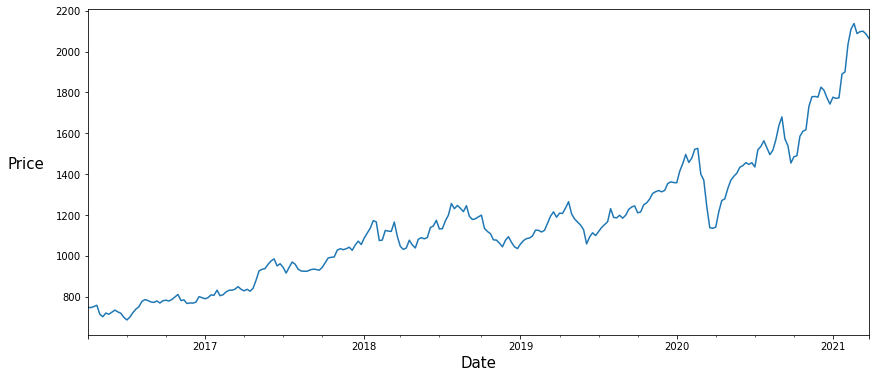

In [11]:
plt.figure(figsize=(14, 6))
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', rotation=0, labelpad=30, fontsize=15)
df_resampled['High'].plot();

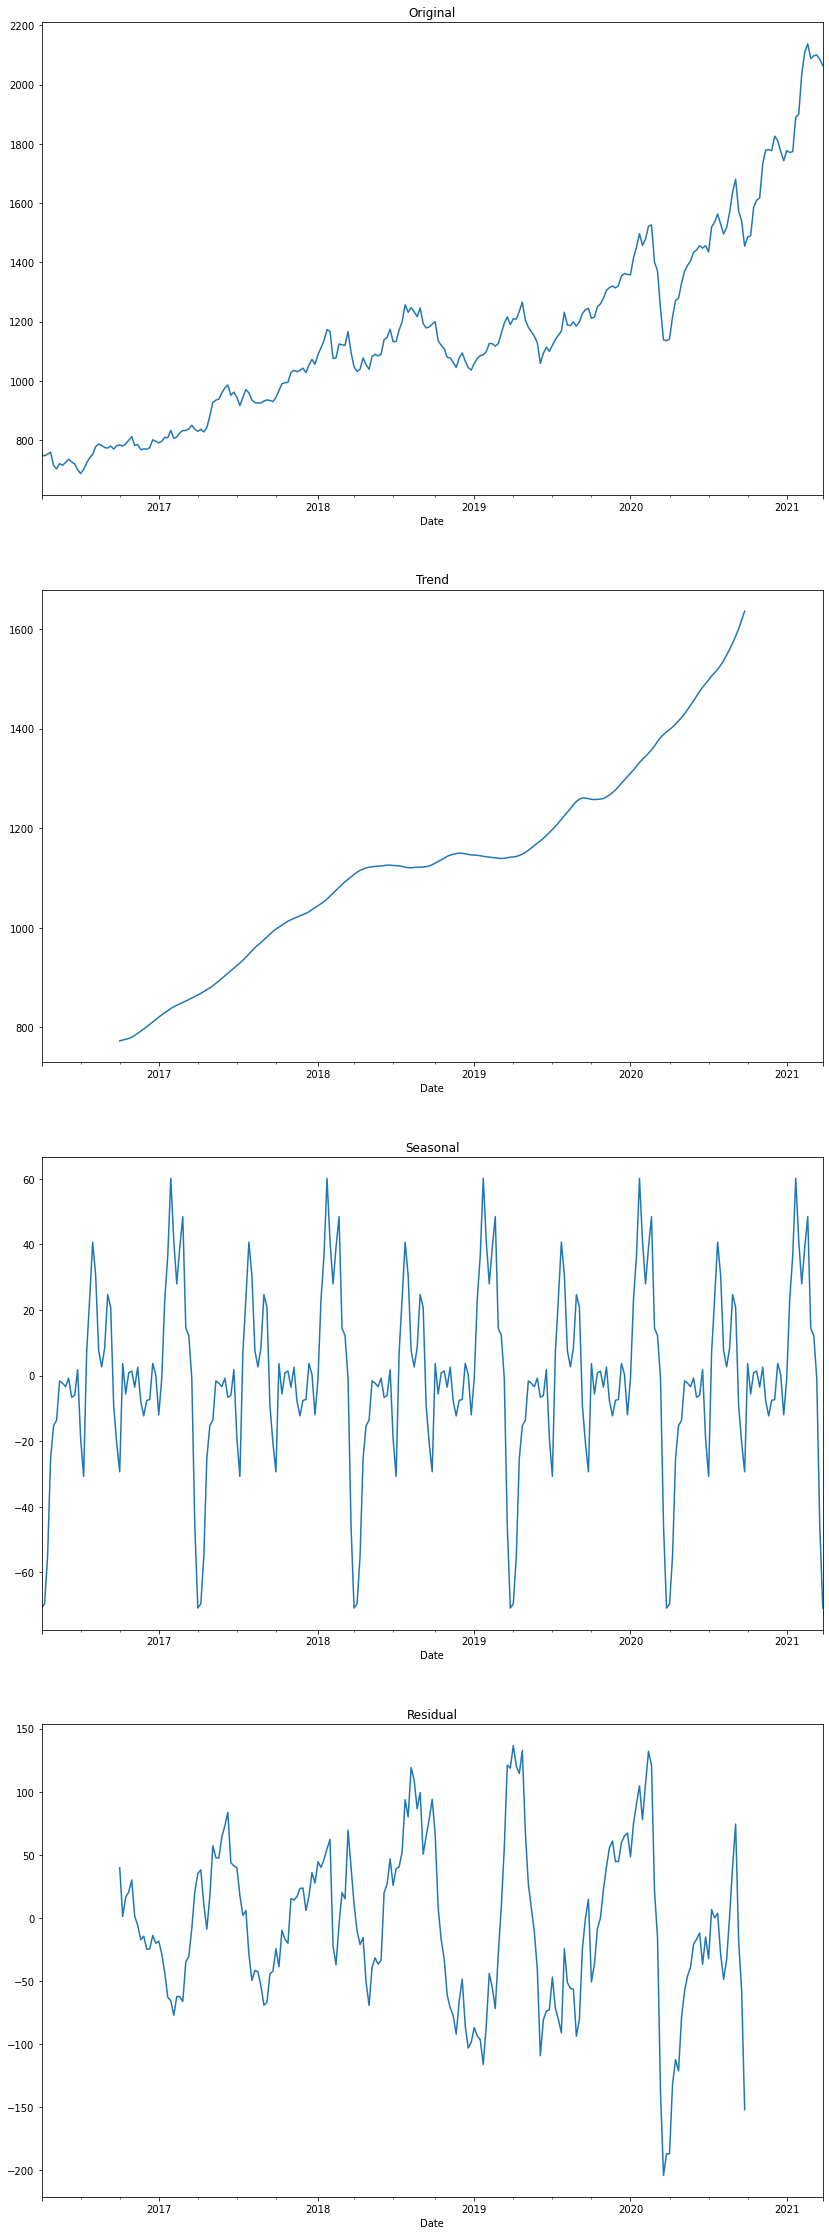

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 40))
decompose = seasonal_decompose(df_resampled[['High']])

ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
ax[3].set_title('Residual')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3]);

In [13]:
df_resampled["Diff_1"] = df_resampled["High"].diff()

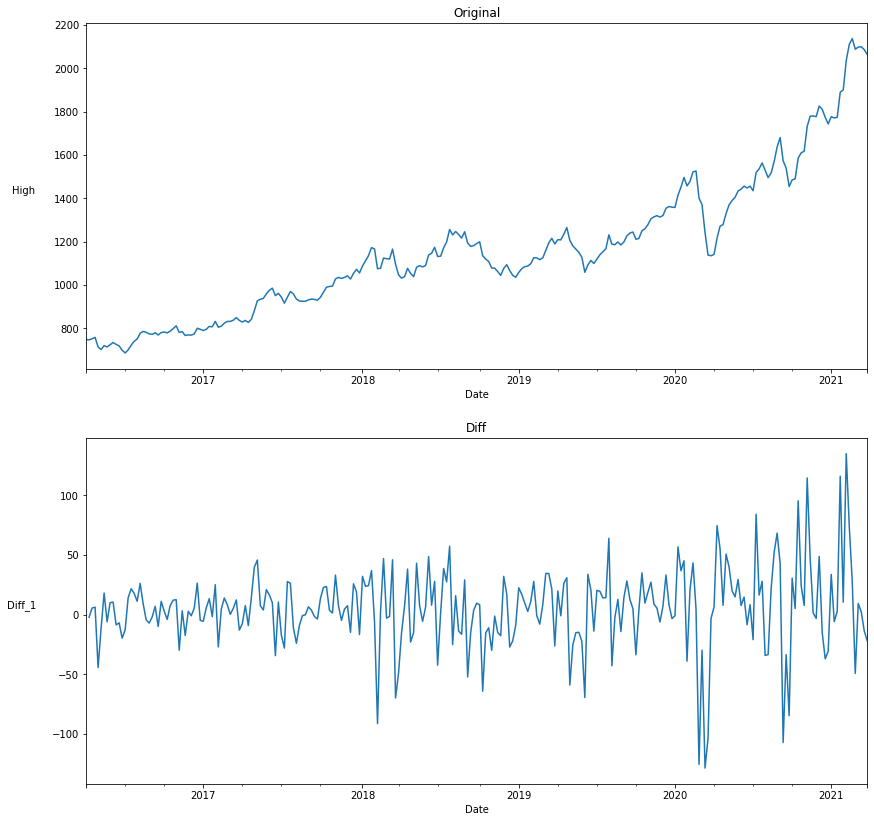

In [14]:
plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

ax = plt.subplot(211)
ax.set_title('Original')
ax.set_ylabel('High', rotation=0, labelpad=30)
df_resampled['High'].plot(ax=ax);

ax = plt.subplot(212)
ax.set_title('Diff')
ax.set_ylabel('Diff_1', rotation=0, labelpad=30)
df_resampled['Diff_1'].plot(ax=ax);

In [15]:
from statsmodels.tsa.stattools import acf, adfuller

p_value = adfuller(df_resampled['Diff_1'][1:])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} < 0.05. Нулевая гипотеза отвергается в пользу альтернативной!'
)

Полученный уровень значимости (p-value): 0.0. 0.0 < 0.05. Нулевая гипотеза отвергается в пользу альтернативной!


In [16]:
df_resampled['HighLog'] = np.log(df_resampled['High'])
df_resampled['HighLogDiff_1'] = df_resampled['HighLog'].diff()
df_resampled.head()

,High,Diff_1,HighLog,HighLogDiff_1
Date,,,,
2016-04-03,749.062000,NaN,6.618822,NaN
2016-04-10,746.857996,-2.204004,6.615875,-0.002947
2016-04-17,752.304004,5.446008,6.623141,0.007265
2016-04-24,758.530408,6.226404,6.631383,0.008242
2016-05-01,714.093188,-44.437219,6.571013,-0.060369


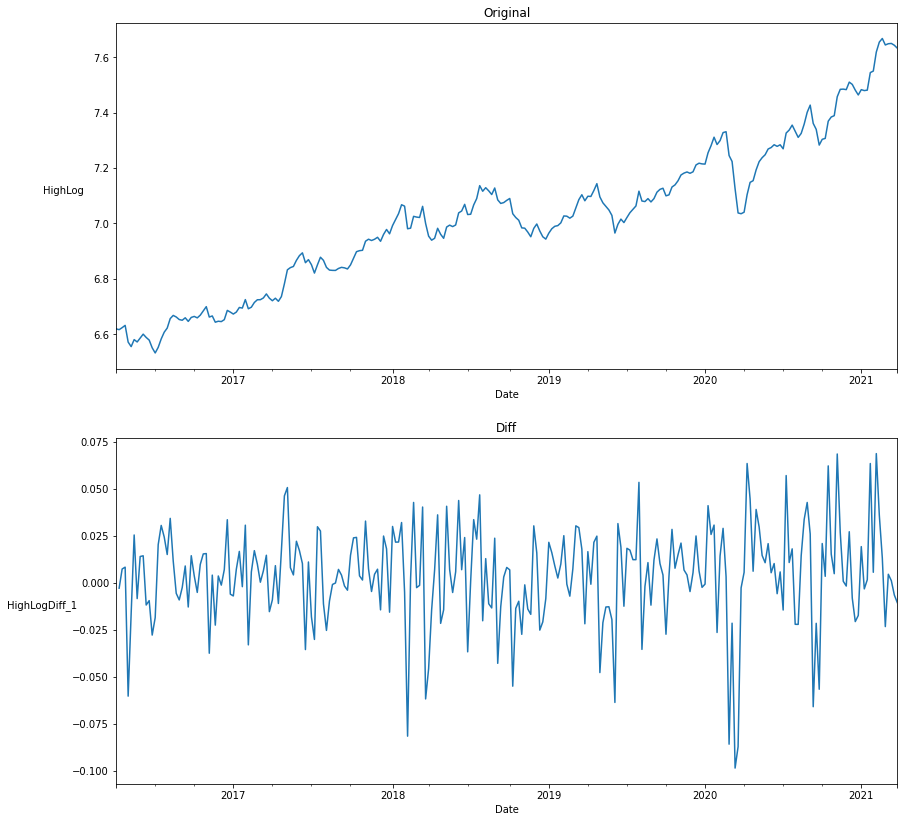

In [17]:
plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

ax = plt.subplot(211)
ax.set_title('Original')
ax.set_ylabel('HighLog', rotation=0, labelpad=30)
df_resampled['HighLog'].plot(ax=ax);

ax = plt.subplot(212)
ax.set_title('Diff')
ax.set_ylabel('HighLogDiff_1', rotation=0, labelpad=30)
df_resampled['HighLogDiff_1'].plot(ax=ax);

In [18]:
p_value = adfuller(df_resampled['HighLogDiff_1'][1:])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} < 0.05. Нулевая гипотеза отвергается в пользу альтернативной!'
)

Полученный уровень значимости (p-value): 0.0. 0.0 < 0.05. Нулевая гипотеза отвергается в пользу альтернативной!


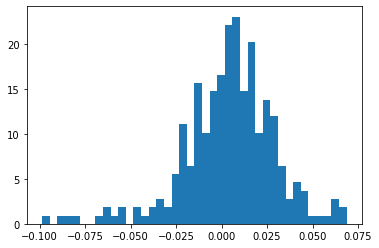

In [19]:
plt.hist(df_resampled['HighLogDiff_1'], density=True, bins=40);

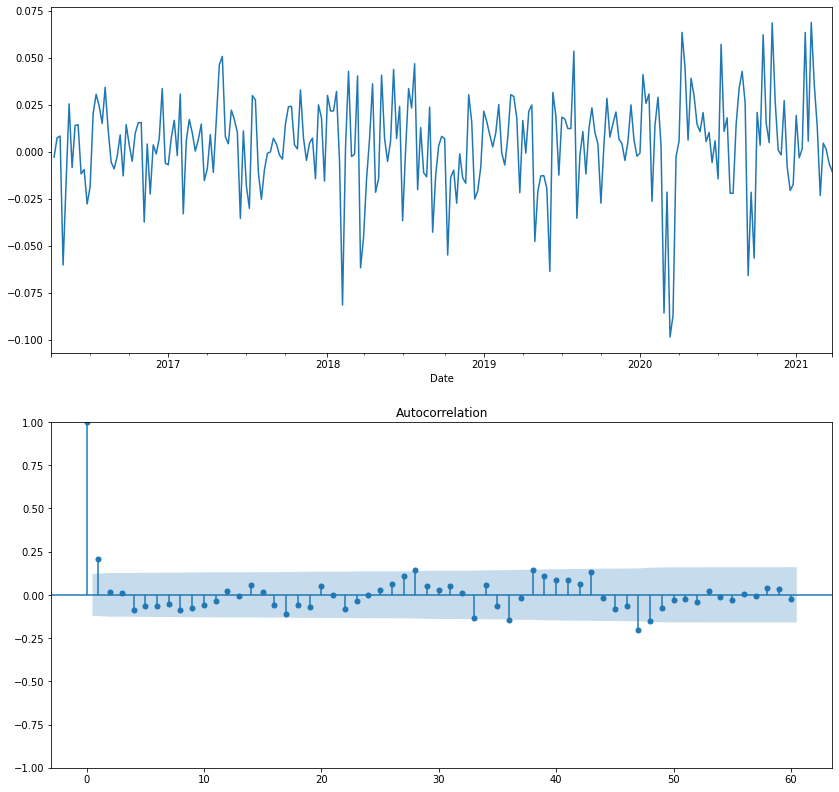

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14, 14))

ax = plt.subplot(211)
df_resampled['HighLogDiff_1'].plot(ax=ax)

ax = plt.subplot(212)
plot_acf(df_resampled['HighLogDiff_1'][1:], lags=60, ax=ax);

In [21]:
df_regression = df_resampled.copy()
df_regression.head()

,High,Diff_1,HighLog,HighLogDiff_1
Date,,,,
2016-04-03,749.062000,NaN,6.618822,NaN
2016-04-10,746.857996,-2.204004,6.615875,-0.002947
2016-04-17,752.304004,5.446008,6.623141,0.007265
2016-04-24,758.530408,6.226404,6.631383,0.008242
2016-05-01,714.093188,-44.437219,6.571013,-0.060369


In [22]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_regression, test_size=0.15, shuffle=False)

In [23]:
d=1
D=1

qs = range(1, 5)
Qs = range(1, 4)

ps = range(1, 5)
Ps = range(3, 5)

In [24]:
from itertools import product
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

96

In [25]:
%%time

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from tqdm import tqdm


results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    try:
        model = sm.tsa.statespace.SARIMAX(
            df_train['HighLog'], 
            order=(param[0], d, param[1]), 
            seasonal_order=(param[2], D, param[3], 12)
        ).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

warnings.filterwarnings('default')

100%|██████████| 96/96 [18:58<00:00, 11.86s/it]

Wall time: 18min 58s


In [26]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

      parameters         aic
3   (1, 1, 4, 1) -916.056273
24  (2, 1, 3, 1) -914.091973
48  (3, 1, 3, 1) -913.196190
33  (2, 2, 4, 1) -912.582999
1   (1, 1, 3, 2) -912.125705


In [27]:
print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            HighLog   No. Observations:                  221
Model:             SARIMAX(1, 1, 1)x(4, 1, 1, 12)   Log Likelihood                 466.028
Date:                            Wed, 24 Nov 2021   AIC                           -916.056
Time:                                    15:53:55   BIC                           -889.356
Sample:                                04-03-2016   HQIC                          -905.260
                                     - 06-21-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4325      0.236     -1.832      0.067      -0.895       0.030
ma.L1          0.6410      0.202   

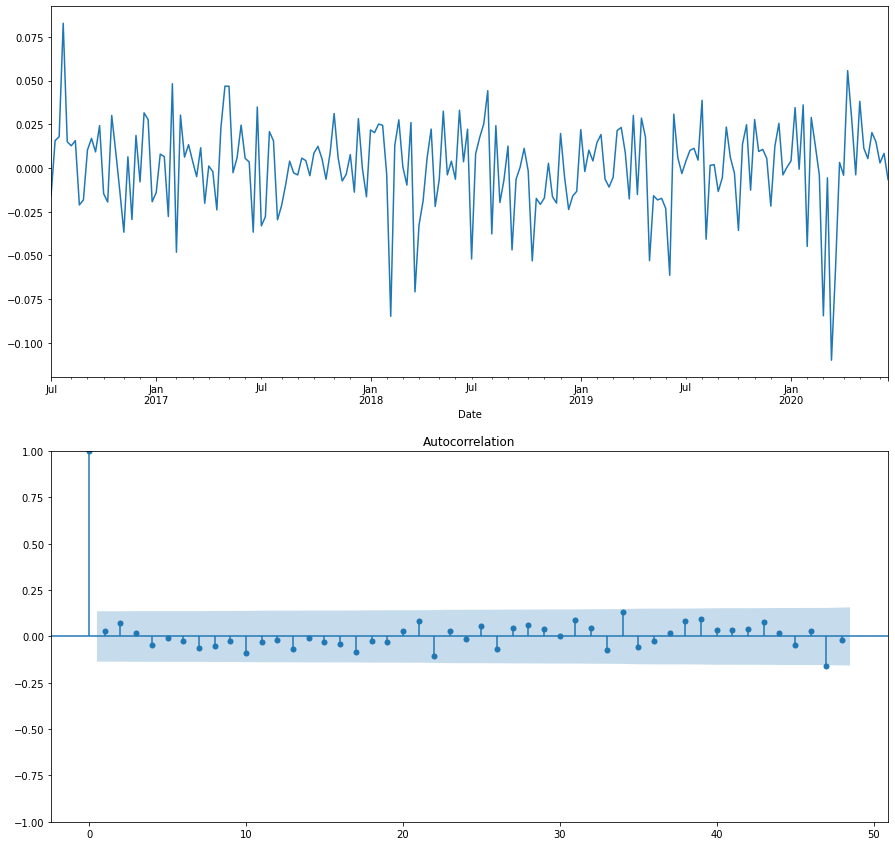

In [28]:
plt.figure(figsize=(15,15))

plt.subplot(211)
best_model.resid[13:].plot()

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax);

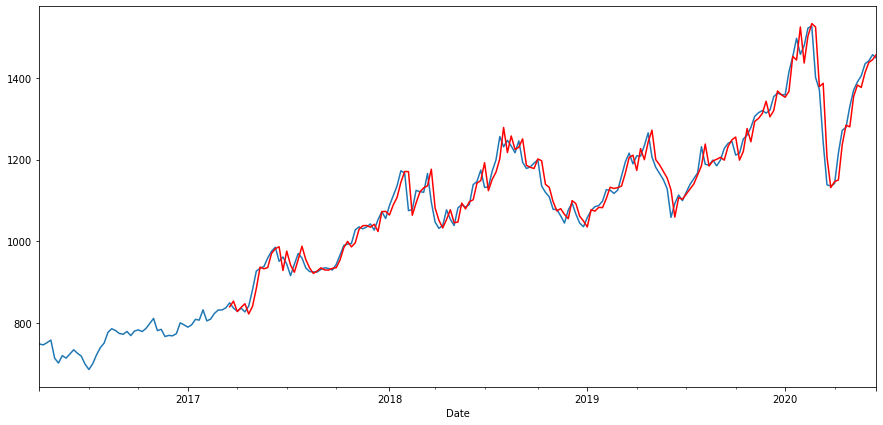

In [29]:
# df_regression['Model'] = np.exp(best_model.fittedvalues)
df_train['Model'] = np.exp(best_model.fittedvalues)

plt.figure(figsize=(15,7))

df_train['High'].plot()
df_train['Model'][50:].plot(c='r');

In [30]:
print(df_regression.shape)
df_regression.tail()

(261, 4)


,High,Diff_1,HighLog,HighLogDiff_1
Date,,,,
2021-02-28,2088.019971,-49.381274,7.643972,-0.023374
2021-03-07,2097.351660,9.331689,7.648431,0.004459
2021-03-14,2099.562012,2.210352,7.649484,0.001053
2021-03-21,2085.800049,-13.761963,7.642908,-0.006576
2021-03-28,2063.672412,-22.127637,7.632242,-0.010665


In [31]:
print(df_train.shape)
df_train.tail()

(221, 5)


,High,Diff_1,HighLog,HighLogDiff_1,Model
Date,,,,,
2020-05-24,1404.598999,14.816577,7.247507,0.010605,1376.353435
2020-05-31,1434.037476,29.438477,7.268249,0.020742,1412.661920
2020-06-07,1441.626392,7.588916,7.273527,0.005278,1437.375374
2020-06-14,1456.344800,14.718408,7.283685,0.010158,1444.192576
2020-06-21,1447.806030,-8.538770,7.277805,-0.005880,1457.440612


In [32]:
import datetime
from dateutil.relativedelta import relativedelta

predict_len = 70

new_close_value = df_train[['High', 'Model']]
future_date = [
    datetime.datetime.strptime("2020-03-29", "%Y-%m-%d") + relativedelta(weeks=x)
    for x in range(0, predict_len)
]

df_future = pd.DataFrame(index=future_date, columns=['High', 'Model'])
new_close_value = pd.concat([new_close_value, df_future])

print(new_close_value.shape)
new_close_value.tail()

(291, 2)


,High,Model
2021-06-27,NaN,NaN
2021-07-04,NaN,NaN
2021-07-11,NaN,NaN
2021-07-18,NaN,NaN
2021-07-25,NaN,NaN


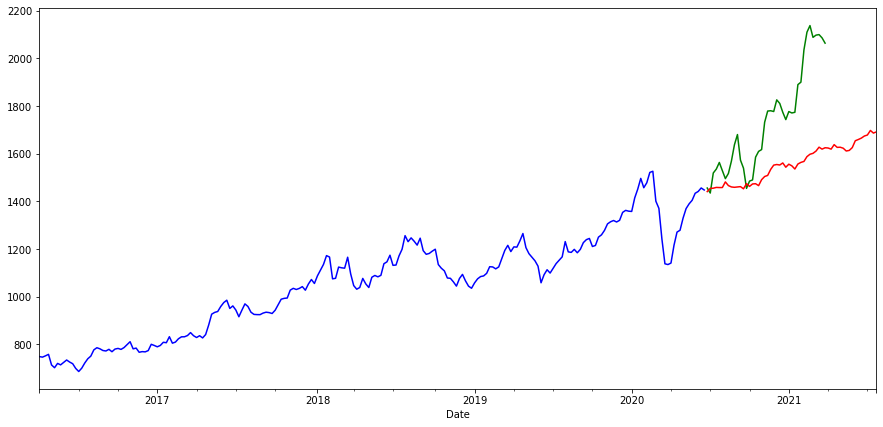

In [42]:
new_close_value['Model'] = np.exp(best_model.predict(start=221, end=221 + predict_len - 1))

plt.figure(figsize=(15,7))
df_train['High'].plot(c='b')
df_test['High'].plot(c='g')
new_close_value['Model'].plot(c='r');

#### MAPE

In [34]:
from sklearn.metrics import mean_absolute_percentage_error

In [35]:
print(len(df_test['High']))
df_test.head()

40


,High,Diff_1,HighLog,HighLogDiff_1
Date,,,,
2020-06-28,1456.092212,8.286182,7.283512,0.005707
2020-07-05,1435.049988,-21.042224,7.268955,-0.014557
2020-07-12,1519.163989,84.114001,7.325915,0.056960
2020-07-19,1535.508350,16.344360,7.336617,0.010701
2020-07-26,1563.357202,27.848853,7.354591,0.017974


In [36]:
df_test.tail()

,High,Diff_1,HighLog,HighLogDiff_1
Date,,,,
2021-02-28,2088.019971,-49.381274,7.643972,-0.023374
2021-03-07,2097.351660,9.331689,7.648431,0.004459
2021-03-14,2099.562012,2.210352,7.649484,0.001053
2021-03-21,2085.800049,-13.761963,7.642908,-0.006576
2021-03-28,2063.672412,-22.127637,7.632242,-0.010665


In [37]:
print(len(new_close_value['Model']))

291


In [40]:
slice_ = new_close_value[new_close_value.index >= datetime.datetime.strptime("2020-06-28", "%Y-%m-%d")]
slice_ = slice_[slice_.index <= datetime.datetime.strptime("2021-03-28", "%Y-%m-%d")]
len(slice_)

40

In [41]:
mean_absolute_percentage_error(df_test['High'], slice_['Model'])

0.11627444650858212